# Tema: Quantidade de mulheres candidatas entre os anos de 1998 até 2016.

Curso: Analise e desenvolvimento de sistemas.

Alunos: Carlos Henrique Monteiro Neto e Thais Bitencourt de meneses.

Professor: Fernando Masanori

# Importando as bibliotecas

In [118]:
import pandas as pd

# Realizando o load dos dados do TXT para o pandas dataframe

In [119]:
candidatos = pd.read_csv('candidatos.csv', sep=';')
candidatos = candidatos.apply(lambda x: x.astype(str).str.upper())

In [120]:
candidatos.head()

,can_id,ano,turno,codmun,codibge6,codcargo,codcand,codpart,siglapart,nomepart,...,data_nasc,codnasc,sexo,estciv,inst,ocup,cpf,leg,sit_pos,Unnamed: 21
0,1,1998,1,0,350000,3,11,11,PPB,PARTIDO PROGRESSISTA BRASILEIRO,...,03/09/1931,355030,2,1,8,-1,1746,4566,6,NAN
1,3,1998,1,0,350000,3,13,13,PT,PARTIDO DOS TRABALHADORES,...,18/03/1945,355030,1,1,8,154,1011,5096,4,NAN
2,5,1998,1,0,350000,3,16,16,PSTU,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,...,09/01/1958,312830,2,2,9,288,204,5081,4,NAN
3,11,1998,1,0,350000,4,131,13,PT,PARTIDO DOS TRABALHADORES,...,28/02/1953,355030,2,1,8,209,1054,5096,4,NAN
4,13,1998,1,0,350000,4,161,16,PSTU,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,...,21/11/1953,330170,1,5,8,33,456,5081,4,NAN


# Visualização da estrutura

In [121]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192674 entries, 0 to 192673
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   can_id       192674 non-null  object
 1   ano          192674 non-null  object
 2   turno        192674 non-null  object
 3   codmun       192674 non-null  object
 4   codibge6     192674 non-null  object
 5   codcargo     192674 non-null  object
 6   codcand      192674 non-null  object
 7   codpart      192674 non-null  object
 8   siglapart    192674 non-null  object
 9   nomepart     192674 non-null  object
 10  nomecand     192674 non-null  object
 11  nomeurna     192674 non-null  object
 12  data_nasc    192674 non-null  object
 13  codnasc      192674 non-null  object
 14  sexo         192674 non-null  object
 15  estciv       192674 non-null  object
 16  inst         192674 non-null  object
 17  ocup         192674 non-null  object
 18  cpf          192674 non-null  object
 19  le

# Candidatas por ano (1998 - 2016)

<AxesSubplot:title={'center':'Porcentagem entre candidatos e candidatas em 1998/2016'}>

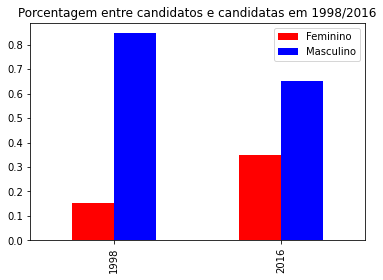

In [122]:
    candidatos_1998 = candidatos.query('ano=="1998"');
    candidatos_2016 = candidatos.query('ano=="2016"');
    
    qtd_2016 = candidatos_2016["sexo"].value_counts(normalize=True);
    qtd_1998 = candidatos_1998["sexo"].value_counts(normalize=True);
    
    porcentagens = pd.DataFrame([qtd_1998, qtd_2016], index=['1998', '2016']).T
    
    pd.concat([porcentagens.min().rename('Feminino'), porcentagens.max().rename('Masculino')], axis=1).plot.bar(color=['red', 'blue'], title='Porcentagem entre candidatos e candidatas em 1998/2016')


# Partidos políticos

In [123]:
partidos_count = candidatos['siglapart'].value_counts()
print(partidos_count)

PSDB       26883
PTB        19653
PT         19284
PV         15435
PPS        15253
PSB        13523
DEM        10356
PP          9542
PFL         8489
PL          5728
PRP         5537
PRB         5335
PSL         4938
PHS         4645
PC DO B     4275
PTN         4166
PPB         3719
PRTB        3061
PSOL        2811
PT DO B     2689
SD          2463
PROS        1335
PST          844
PMB          787
PSTU         610
REDE         541
PGT          526
PCB          203
NOVO          38
PSN            5
Name: siglapart, dtype: int64


<AxesSubplot:title={'center':'Candidatos por partidos (masculinos e femininas)'}>

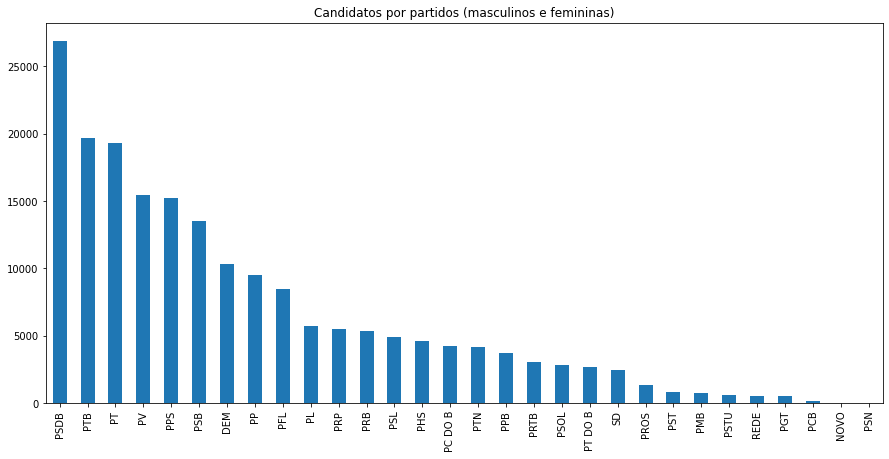

In [124]:
partidos_count.plot(kind='bar', width=0.5, title='Candidatos por partidos (masculinos e femininas)', grid=False, figsize=(15,7))

#  Candidatas em partidos

In [125]:
partidos_candidatas_count = candidatos.query('sexo=="1"');
partidos_candidatas_count = partidos_candidatas_count['siglapart'].value_counts()
print(partidos_candidatas_count)

PSDB       7768
PT         5756
PTB        5648
PV         4877
PPS        4302
PSB        3938
DEM        3247
PP         2723
PFL        2025
PRB        1771
PRP        1660
PSL        1522
PHS        1412
PL         1382
PC DO B    1364
PTN        1294
PRTB        889
PSOL        873
SD          847
PT DO B     840
PPB         768
PROS        424
PMB         356
PST         197
PSTU        195
REDE        179
PGT          99
PCB          52
NOVO         14
PSN           2
Name: siglapart, dtype: int64


<AxesSubplot:title={'center':'Candidatas por partidos'}>

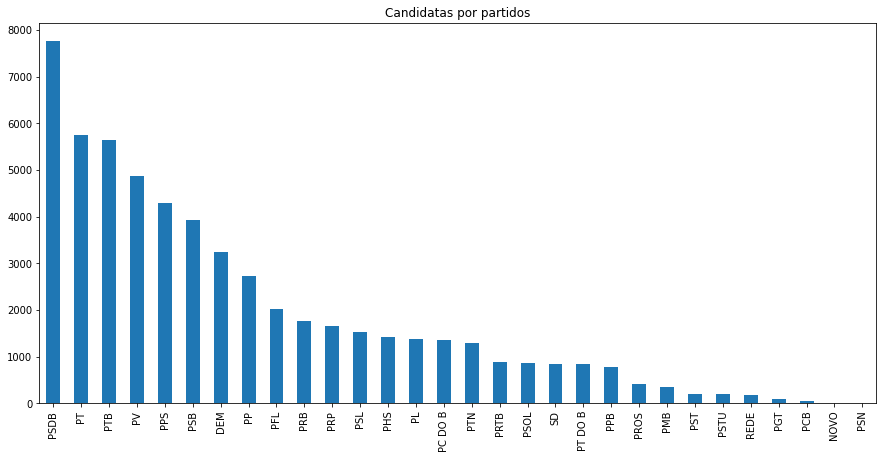

In [126]:
partidos_candidatas_count.plot(kind='bar', width=0.5, title='Candidatas por partidos', grid=False, figsize=(15,7))

# Homens x Mulheres

Text(0.5, 1.0, 'Porcentangem dos generos entre os candidatos')

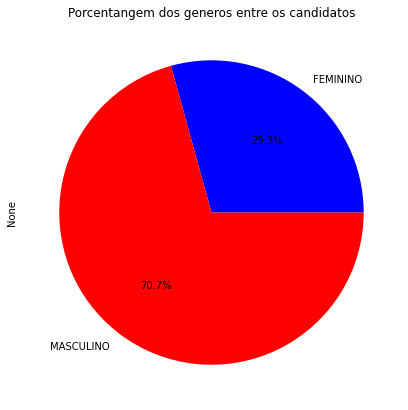

In [127]:
plot = candidatos.groupby('sexo').size().sort_values().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=['FEMININO', 'MASCULINO'], figsize=(15,7))
plot.set_title('Porcentangem dos generos entre os candidatos')